CASE STUDY I: PREDIKSI GAJI KARYAWAN

Dataset: salary_data

Mr. Park adalah seorang data scientist. Dia ditugaskan oleh HR untuk membuat model machine learning untuk memprediksi gaji sehingga dapat digunakan dalam penentuan gaji karyawan. Bantu Mr. Park untuk melakukan hal-hal berikut.

# Business Understanding

> User: HR

> Permasalahan: HR masih menentukan gaji berdasarkan subjektif

> Kebutuhan: Data Employee

In [ ]:
'''
Import Modul
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
'''
Import Modul untuk Mengambil Data via Drive
'''

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Data Understanding

In [ ]:
'''
Get The Data
'''
data = drive.CreateFile({'id':'1WXhG5jfDVW0TJIShxtirOhiODvxFo9KT'})
data.GetContentFile('data.csv')

In [ ]:
'''
Read The Data
'''
df = pd.read_csv('data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
'''
Data shape
'''
df.shape

(375, 6)

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
'''
Data Description
'''
df.describe(include='all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [ ]:
'''
Data Type
'''
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
'''
Data Numerikal
'''

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [ ]:
'''
Data kategorikal
'''

cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director


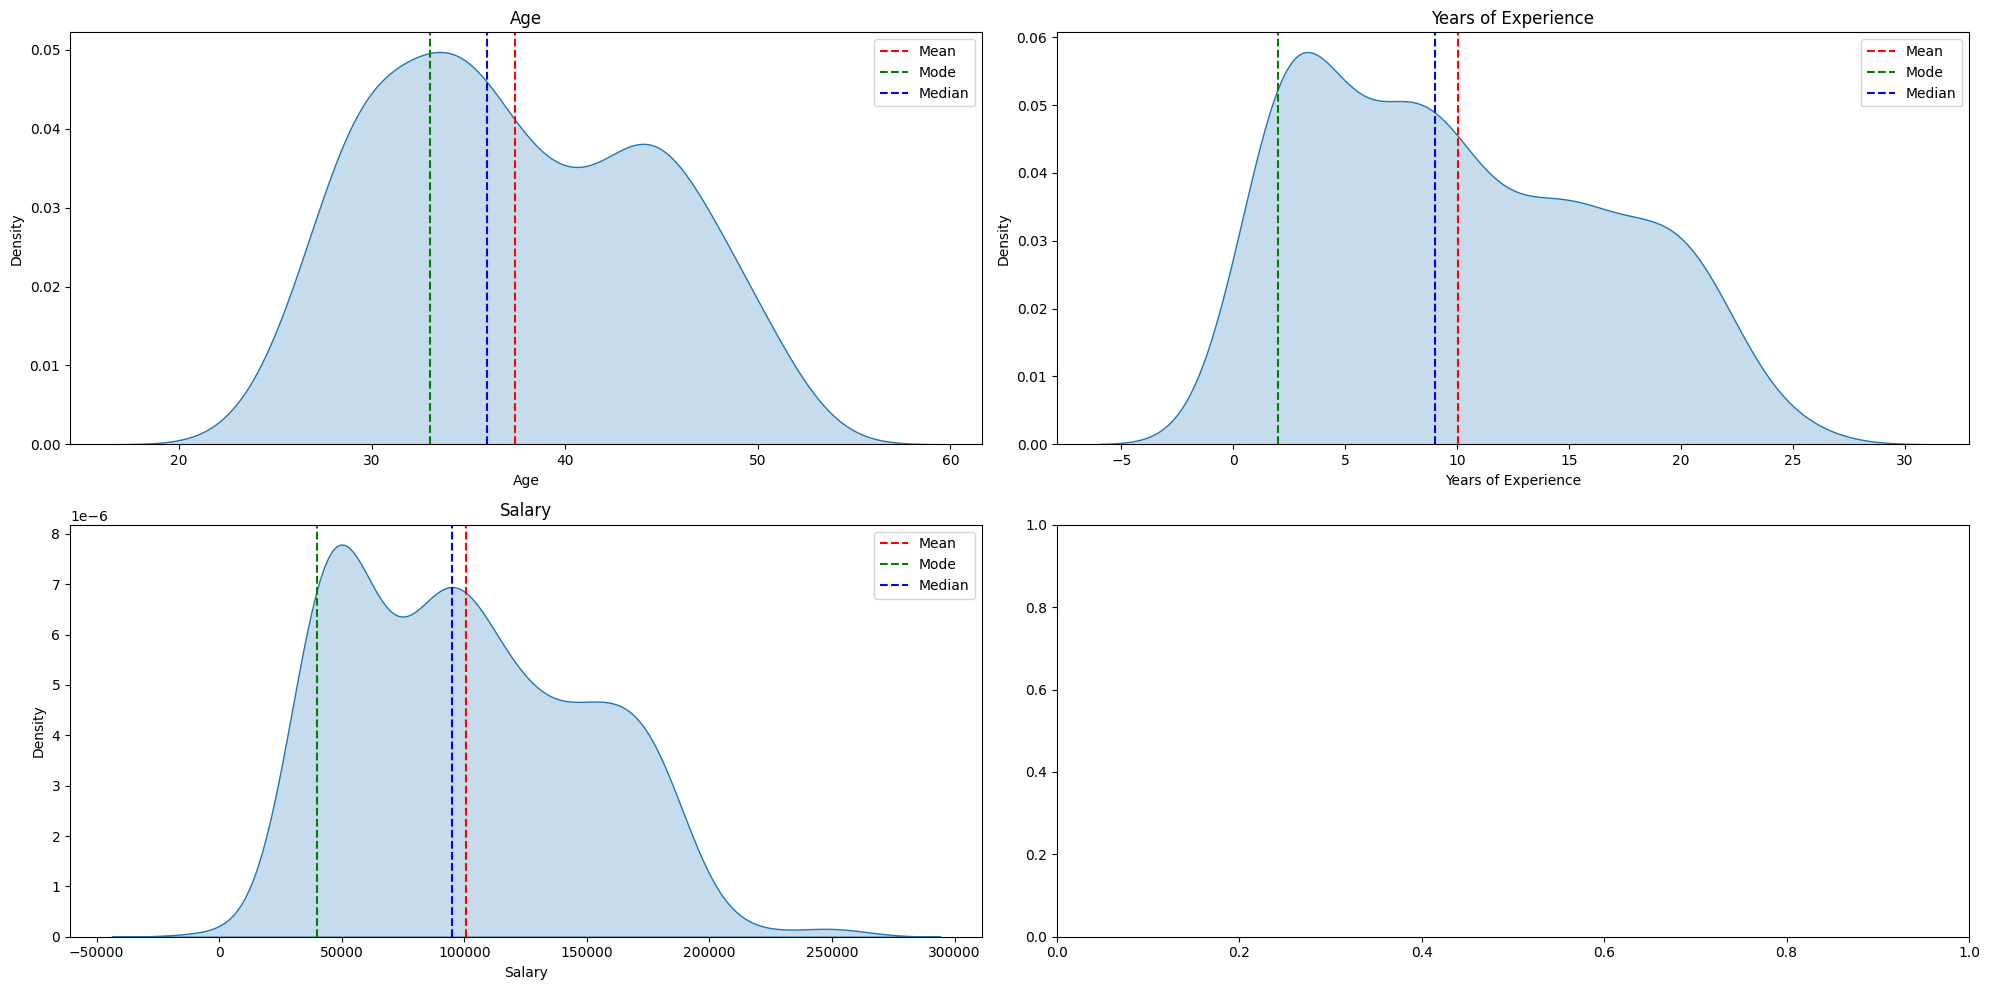

In [ ]:
'''
Distribusi Numerikal
'''

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, attr in enumerate(num_df):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

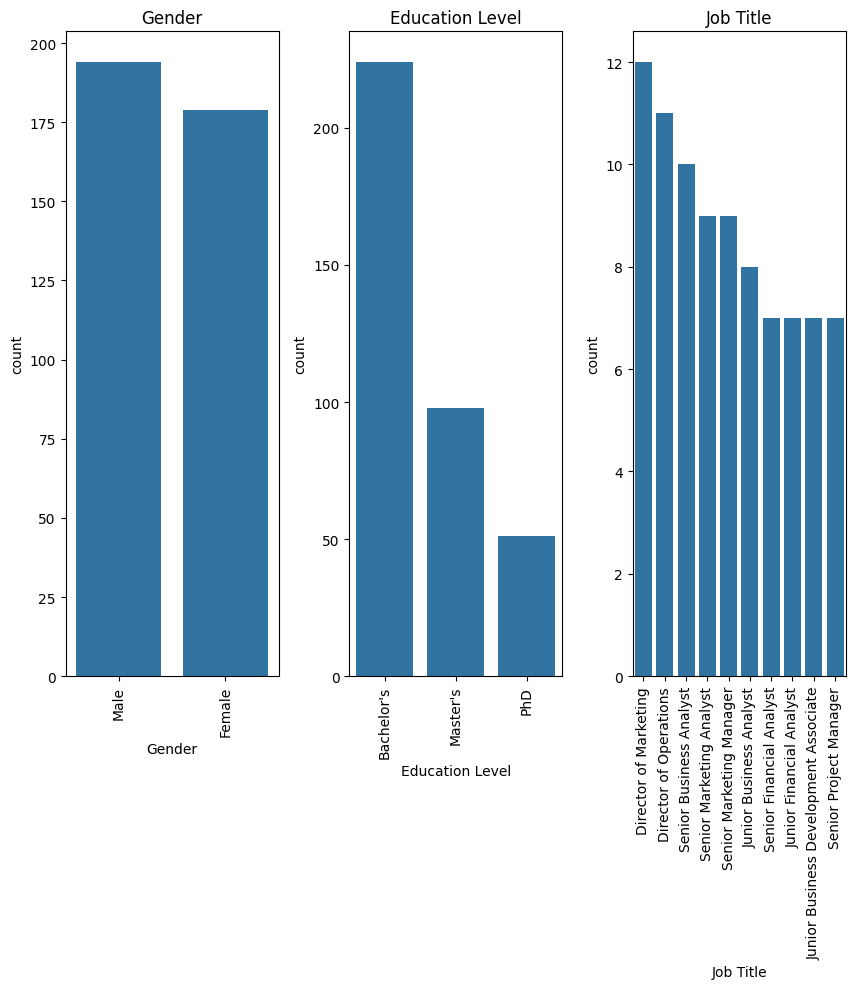

In [ ]:
'''
Distribusi Kategorikal
'''

plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_df.columns):
    plt.subplot(1, 7, i+1)
    top_10_values = cat_df[column].value_counts().head(10)
    sns.countplot(data=cat_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
# Buat ngecek relevansi data: semakin 1 semakin relevan

df.corr()

<ipython-input-232-f415beaefaa2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,Age,float64,2,0.53,31,"[32.0, 28.0, 45.0, 36.0, 52.0, 29.0, 42.0, 31...."
1,Gender,object,2,0.53,2,"[Male, Female, nan]"
2,Education Level,object,2,0.53,3,"[Bachelor's, Master's, PhD, nan]"
3,Job Title,object,2,0.53,174,"[Software Engineer, Data Analyst, Senior Manag..."
4,Years of Experience,float64,2,0.53,28,"[5.0, 3.0, 15.0, 7.0, 20.0, 2.0, 12.0, 4.0, 1...."
5,Salary,float64,2,0.53,36,"[90000.0, 65000.0, 150000.0, 60000.0, 200000.0..."


## Renaming

In [ ]:
df.rename(columns={'Education Level': 'ed_level'}, inplace=True)
df.columns

Index(['Age', 'Gender', 'ed_level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df.rename(columns={'ed_level': 'Education Level'}, inplace=True)
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

## Sorting dan Reordering

In [ ]:
df.sort_values('Years of Experience', ascending = False)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
121,53.0,Male,Master's,Director of Marketing,25.0,180000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
93,52.0,Female,Master's,Senior Marketing Manager,25.0,170000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
158,51.0,Female,PhD,Director of Human Resources,23.0,185000.0
...,...,...,...,...,...,...
82,25.0,Male,Bachelor's,Sales Representative,0.0,30000.0
49,25.0,Male,Bachelor's,Help Desk Analyst,0.0,35000.0
18,25.0,Female,Bachelor's,Data Entry Clerk,0.0,35000.0
172,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
df = df.sort_index(axis=0, ascending = False) # Baris
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
...,...,...,...,...,...,...
4,52.0,Male,Master's,Director,20.0,200000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [ ]:
df = df.sort_index(axis=1, ascending = False) # Kolom
df

,Years of Experience,Salary,Job Title,Gender,Education Level,Age
374,15.0,150000.0,Senior Business Analyst,Female,PhD,44.0
373,7.0,90000.0,Senior Operations Coordinator,Male,Bachelor's,34.0
372,2.0,40000.0,Junior Project Manager,Female,Bachelor's,29.0
371,19.0,170000.0,Director of Operations,Male,Master's,43.0
370,8.0,85000.0,Senior Marketing Analyst,Female,Bachelor's,35.0
...,...,...,...,...,...,...
4,20.0,200000.0,Director,Male,Master's,52.0
3,7.0,60000.0,Sales Associate,Female,Bachelor's,36.0
2,15.0,150000.0,Senior Manager,Male,PhD,45.0
1,3.0,65000.0,Data Analyst,Female,Master's,28.0


## Missing Value

In [ ]:
'''
Check Null dengan .info()
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 374 to 0
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
 2   Job Title            373 non-null    object 
 3   Gender               373 non-null    object 
 4   Education Level      373 non-null    object 
 5   Age                  373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.5+ KB


In [ ]:
df.shape

(375, 6)

In [ ]:
'''
Check Null dengan .describe()
'''

df.describe()

,Years of Experience,Salary,Age
count,373.000000,373.000000,373.000000
mean,10.030831,100577.345845,37.431635
std,6.557007,48240.013482,7.069073
min,0.000000,350.000000,23.000000
25%,4.000000,55000.000000,31.000000
50%,9.000000,95000.000000,36.000000
75%,15.000000,140000.000000,44.000000
max,25.000000,250000.000000,53.000000


In [ ]:
'''
Check Null dengan .isnull()
'''

df.isnull().sum()

Years of Experience    2
Salary                 2
Job Title              2
Gender                 2
Education Level        2
Age                    2
dtype: int64

### Drop baris atau kolom yang memiliki nilai null

In [ ]:
'''
Penganganan Missing Value JIKA baris HANYA SEDIKIT nilai NULL-nya
'''
df.dropna(inplace=True) # NGILANGIN SEMUA BARIS YANG ADA NILAI NULL

In [ ]:
df.isnull().sum()

Years of Experience    0
Salary                 0
Job Title              0
Gender                 0
Education Level        0
Age                    0
dtype: int64

In [ ]:
df.shape

(373, 6)

In [ ]:
'''
Penanganan Missing Value JIKA kolom pada suatu atribut memiliki BANYAK baris yang hilang
'''

# Anggap jika Job Title memilki persentase nilai null mencapai 50%
df.drop(['Job Title'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Years of Experience    0
Salary                 0
Gender                 0
Education Level        0
Age                    0
dtype: int64

### Pengisian nilai

In [ ]:
'''
Misal fitur Age memiliki distribusi normal, pengisian dengan mean
'''

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
'''
Misal fitur Age memiliki distribusi skewed, pengisian dengan median
'''

df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
'''
Misal fitur kategorikal, Pengisian dengan modus
'''

df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)

### Menggunakan Model

In [ ]:
from sklearn.model_selection import train_test_split # Misahin data jadi train sama test
from sklearn.ensemble import RandomForestRegressor # Model buat prediksi
from sklearn.metrics import mean_squared_error # Evaluasi model, seberapa bagus model
from sklearn.preprocessing import LabelEncoder # Encode, Kategorikal jadi Numerikal

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [ ]:
train_data = df.dropna(subset=['Age']) # Buat model belajar
test_data = df[df['Age'].isnull()] # Buat ujian

X_train = train_data.drop('Age', axis=1)
y_train = train_data['Age']
X_test = test_data.drop('Age', axis=1)

In [ ]:
model = RandomForestRegressor() # Model belom pinter
model.fit(X_train, y_train) # Model belajar

RandomForestRegressor()

In [ ]:
predicted_age = model.predict(X_test)

In [ ]:
predicted_age

array([36.6, 36.6])

In [ ]:
df.loc[df['Age'].isnull(), 'Age'] = predicted_age

In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## Penanganan Data Duplikasi

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
370     True
371    False
372     True
373     True
374     True
Length: 375, dtype: bool

In [ ]:
df.duplicated().value_counts()

False    325
True      50
dtype: int64

In [ ]:
df.shape

(375, 6)

In [ ]:
df = df.drop_duplicates() # df.drop_duplicates(inplace = True)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(325, 6)